In [10]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
import pandas as pd  
#import numpy as np  
#import matplotlib.pyplot as plt  
%matplotlib inline

import sklearn.metrics as metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

#from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [11]:
data = pd.read_csv('unplugged.csv')
data.shape
data = data[0:360]
gender = {'M': 1, 'F': 2}
data.Gender = [gender[item] for item in data.Gender]
result_before = {'P': 1, 'F': 0}
result_after = {'P': 1, 'F': 0}
data.Results_Before = [result_before[item] for item in data.Results_Before]
data.Results_After = [result_after[item] for item in data.Results_After]
print(data.head(5))

  School Name Student Name  Age  Gender  Results_Before  Results_After  Class  \
0   IMSJ G9-2       Anthny   12       1               0              0      4   
1   IMSJ G9-2  Farhana Ali   10       2               0              0      4   
2   IMSJ G9-2    Samiullah   10       1               0              0      4   
3   IMSJ G9-2        Uzair   12       1               0              0      4   
4   IMSJ G9-2        Sarim    8       1               1              1      4   

   Comments Change Positive Outcomes  
0       NaN      F                 F  
1       NaN      F                 F  
2       NaN      F                 F  
3       NaN      F                 F  
4       NaN      T                 F  


In [12]:
data =data[['Age','Gender','Class','Results_Before', 'Results_After','Positive Outcomes']]
data.head()
#data =data[['Age','Gender','Class','Results_Before', 'Results_After','Change']]

,Age,Gender,Class,Results_Before,Results_After,Positive Outcomes
0,12,1,4,0,0,F
1,10,2,4,0,0,F
2,10,1,4,0,0,F
3,12,1,4,0,0,F
4,8,1,4,1,1,F


In [13]:
array = data.values
X = array[:,0:5]
Y = array[:,5:]
# X = array[:,0:3]
# Y = array[:,3:]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

c = [10 ** (-3), 10 ** (-2), 10 ** (-1), 10 ** 0, 10 ** 1, 10 ** 2, 10 ** 3]
g = [10 ** (-9), 10 ** (-7), 10 ** (-5), 10 ** (-3)]
best_values = [0.0, 0.0, 0.0]  # respectively best success rate, best C and best gamma

k_fold = KFold(n_splits=5)

print('Performing 5-Fold validation on RBF')
for i in c:
    plt.figure(figsize=(40, 20))
    for j in g:
        for id_train, id_test in k_fold.split(x_train):
            svc = svm.SVC(kernel='rbf', C=i, gamma=j)
            score = svc.fit(x_train[id_train], y_train[id_train]).score(x_train[id_test], y_train[id_test])
            #print('With C=' + str(i) + ' and gamma=' + str(j) + ' avg=' + str(score))
            if score > best_values[0]:
                best_values = score, i, j

print('Best accuracy=' + str(best_values[0]) + ' with C=' + str(best_values[1]) + ' and gamma=' + str(best_values[2]))

# With the best C ang gamma evaluating k-fold on test set
print('Evaluating test set')
svc = svm.SVC(kernel='rbf', C=best_values[1], gamma=best_values[2])
svc.fit(x_train, y_train)
print(svc.score(x_test, y_test))

Performing 5-Fold validation on RBF


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A 

Best accuracy=1.0 with C=100 and gamma=0.001
Evaluating test set
1.0


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A 

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

In [15]:
predictions = svc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
              precision    recall  f1-score   support

           F       1.00      1.00      1.00        60
           T       1.00      1.00      1.00        48

   micro avg       1.00      1.00      1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



AUC: 1.000


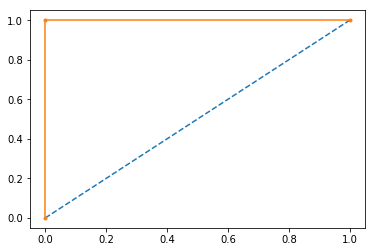

In [16]:
testy = []
probsy = []
probs = predictions[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(y_test)):
    if (y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()